# **Библиотека Telebot**

Официальная документация: https://pypi.org/project/pyTelegramBotAPI/

Справочный материал с примерами: https://telegrambots.github.io/book/index.html

**Боты** — это неболь­шие скрип­ты, которые могут вза­имо­дей­ство­вать с API, что­бы получать сооб­щения от поль­зовате­ля и отправ­лять информа­цию в раз­ные чаты и каналы.

*API (англ. Application Programming Interface — программный интерфейс приложения) — это набор способов и правил, по которым различные программы общаются между собой и обмениваются данными.* 

# Получение токена для Telegram-бота
Чтобы создать бота на Python нужно зайти в Telegram под сво­им акка­унтом, обратиться к официальному боту от Telegram - BotFather и получить токен — стро­ку, которая будет однознач­но иден­тифици­ровать нашего бота для сер­веров Telegram. 

Переходим в BotFather - https://t.me/BotFather и нажимаем «Запустить» (или отпра­вим /start), в ответ BotFather приш­лет нам спи­сок дос­тупных команд:

    /newbot — соз­дать нового бота;
    /mybots — редак­тировать ваших ботов;
    /setname — сме­нить имя бота;
    /setdescription — изме­нить опи­сание бота;
    /setabouttext — изме­нить информа­цию о боте;
    /setuserpic — изме­нить фото ава­тар­ки бота;
    /setcommands — изме­нить спи­сок команд бота;
    /deletebot — уда­лить бота.

От­пра­вим BotFather коман­ду /newbot, что­бы соз­дать нового бота. В ответ он поп­росит ввес­ти имя будуще­го бота, его мож­но писать на рус­ском. Пос­ле вво­да име­ни нуж­но будет отпра­вить адрес бота, при­чем он дол­жен закан­чивать­ся на сло­во bot. Нап­ример, pythonbot или first_bot. Если адрес уже кем‑то занят, появится сообщение с просьбой придумать другой.

Когда свободный адрес будет найден, в ответ получим сооб­щение, в котором пос­ле фра­зы `Use this token to access the HTTP API` будет написа­на стро­ка из букв и цифр — это необ­ходимый нам токен. Сох­раним его.

# Установка библиотеки telebot и знакомство с pyTelegramBotAPI

После получения токена в командной строке (или в терминале, если MacOS) нужно написать:
```
pip install pyTelegramBotAPI 
```
для MacOS:
```
pip3 install pyTelegramBotAPI
```


# 1. Простой бот, отправляющий текстовые сообщения "Эхо-бот"

Реализуем простого бота, который будет получать от поль­зовате­ля тек­сто­вое сооб­щение и воз­вра­щать его обратно (повторять).

После создания файла нужно импортировать библиотеку и ввести токен:

In [ ]:
import telebot

api_token = ('Вписать токен, полученный от @botfather')
# создаем экземпляр объекта
bot = telebot.TeleBot(api_token)

Взаимодействие с ботом происходит через переменную `bot`.

Команда, с которой начинается общение пользователя с ботом - /start. Научим бота реагировать на эту команду. 

Создадим `message handler` – это обработчик всех сообщений, которые отправляет пользователь. Обработчик реагирует на входящие сообщения. В нашем примере обработчик будет реагировать на команду /start, поэтому укажем имя функции, которая будет вызывается при наступлении данного события. И напишем саму функцию `start`.

`message` – это объект из Bot API, содержащий в себе информацию о сообщении. Полезные поля:

    message.chat.id – идентификатор чата
    message.from.id – идентификатор пользователя
    message.text – текст сообщения

В нашем примере функция `send_message` принимает идентификатор чата (берем его из сообщения) и текст для отправки.

In [ ]:
@bot.message_handler(commands=['start'])

def start(message):
    bot.send_message(message.chat.id, text=f"{message.text} :)")

Чтобы получать сообщения от серверов Telegram воспользуемся поллингом (polling. to poll - опрашивать) - постоянным опросом сервера на наличие новых обновлений. Параметр `none_stop` указывает, что мы хотим принимать сообщения постоянно. В стандартном положении параметр равен `False`, но мы ставим `True`. 

In [ ]:
bot.polling(none_stop=True, interval=0)

Теперь нужно запустить скрипт и найти в поис­ке Telegram сво­его бота по адре­су. Запус­каем бота кноп­кой «Запус­тить» (Start) или коман­дой /start и можем убе­дить­ся в том, что он работа­ет и воз­вра­щает сооб­щения:

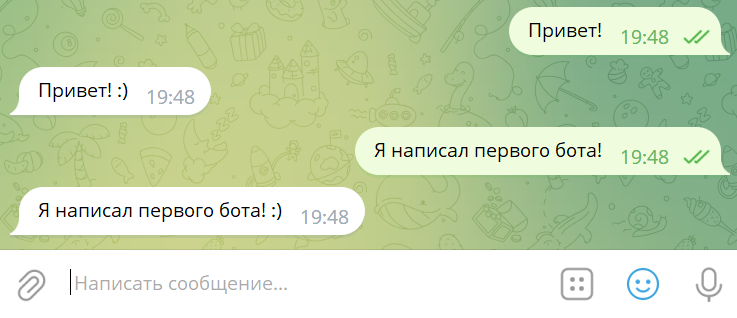

In [ ]:
# Полный код
import telebot

api_token = ('Вписать токен, полученный от @botfather')
bot = telebot.TeleBot(api_token)

@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(message.chat.id, text=f"{message.text} :)")

bot.polling(none_stop=True, interval=0)

# 2. Простой бот, отправляющий изображения

**Важно!** Ес­ли для этого бота будет использоваться тот же токен, что и для пре­дыду­щего, то необходимо переза­пус­ти бота коман­дой /start.


В примере 1 была использована функция `send_message()`, позволяющая боту реагировать на команду /start текстовым сообщением. Заменим ее на функцию `send_photo()`, чтобы отправлять фото из локального хранилища или по ссылке.

In [ ]:
import telebot

api_token = ('Вписать токен, полученный от @botfather')
bot = telebot.TeleBot(api_token)

@bot.message_handler(commands=['start'])
def start(message):
    photo_url = 'clck.ru/34BjWC'
    bot.send_photo(message.chat.id, photo=photo_url, caption='It works!')
    
bot.polling(none_stop=True, interval=0)

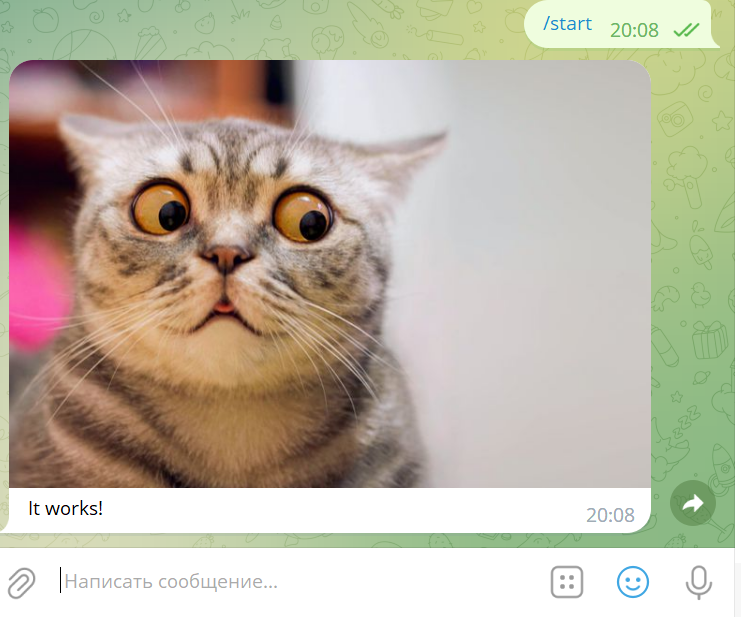

# 3. Бот "Ещё больше котиков!"

Усовершенствуем бота из примера 2, так, чтобы он отправлял по заданной команде случайные изображения котиков.
Для этого примера потребуется установка ещё одной библиотеки:
```
pip install requests

```
*Библиотека **requests** используется для упрощения работы с HTTP-запросами. Библиотека позволяет легко и с минимальным количеством кода взаимодействовать с веб-приложениями. Это необходимо для решения любых задач, связанных с передачей информации от пользователя к серверу и обратно.* 

Бот будет состоять из двух функций (помимо функции `start()`, которая отправляет приветствие в чат). Первая - `send_cat()`, будет отвечать за отправку изображений с котиками в чат. Вторая функция - `get_cat()` будет отвечать за предоставление ссылок на изображения с котиками, брать которые мы будет с сайта  thecatapi. Его API позволяет получать ссылки на случайные картинки с котами, чем мы и воспользуемся.

In [ ]:
import telebot
import requests

api_token = ('Вписать токен, полученный от @botfather')
bot = telebot.TeleBot(api_token)

@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(message.chat.id, text='Привет, я бот, который очень любит котиков! \n Напиши мне /send_cat  и поделюсь ими с тобой)')

# получение ссылки на картинку с котиком
def get_cat():
  try:
    r = requests.get('http://thecatapi.com/api/images/get?format=src')
    url=r.url
  except:
    url=get_cat()
  return url

# отправка котиков
@bot.message_handler(commands=['send_cat'])
def send_cat(message):
  bot.send_photo(message.chat.id, photo=get_cat())

bot.polling(none_stop=True, interval=0)

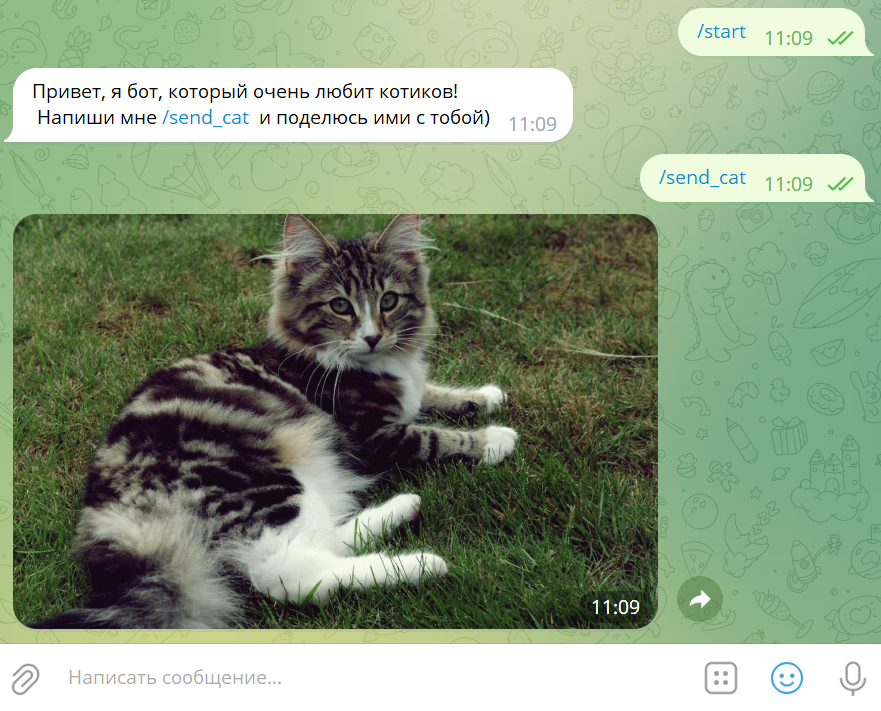

# 4. Бот "Ещё больше котиков!" c виртуальной кнопкой
Усовершенствуем бота из Примера 3: сделаем кнопку в чате, чтобы не писать постоянно команду /send_cat вручную.

Будем использовать ReplyKeyboardMarkup клавиатуру. 

ReplyKeyboardMarkup — это шаблоны сообщений. К примеру, бот задаёт пользователю вопрос и предлагает варианты ответа. Пользователь может самостоятельно напечатать ответ, либо нажать на готовую кнопку. Такая клавиатура не привязана ни к какому сообщению. В кнопки такой клавиатуры нельзя заложить никакой информации, нельзя запрограммировать ее поведение. В чат будет отправлено будет только то, что написано на кнопке.

* `markup=types.ReplyKeyboardMarkup(resize_keyboard=True)` добавляем клавиатуру, параметр `resizeKeyboard = True` указали для изменения размера клавиатуры по вертикали для оптимального соответствия;
*`button = types.KeyboardButton("Хочу ещё котика!")` cохраняем в переменную `button` экземпляр кнопки, указываем текст, который будет отправляться в чат, при нажатии на кнопку;
*`markup.row(button)` размещаем все кнопки клавиатуры в одной строке (в ряд). Есть несколько методов, позволяющих добавить кнопку, у нас одна кнопка, можно использовать команду `markup.add(button)`
*`bot.send_message(message.chat.id, text='Привет,...', reply_markup=markup)` параметр `reply_markup=markup` отвечает за отображение кнопки в чате (связывает кнопку и сообщение)

In [ ]:
# Полный код
import telebot
import requests
# для того, чтобы кнопки заработали нужно импортировать types
from telebot import types

api_token = ('Вписать токен, полученный от @botfather')
bot = telebot.TeleBot(api_token)

# функция для получения ссылки на картинку с котиком
def get_cat():
  try:
    r = requests.get('http://thecatapi.com/api/images/get?format=src')
    url=r.url
  except:
    url=get_cat()
  return url

# обработчик команды /start
@bot.message_handler(commands=['start'])
def start(message):
    markup=types.ReplyKeyboardMarkup(resize_keyboard=True)
    button = types.KeyboardButton("Хочу ещё котика!")
    # размещаем кнопки в ряд
    markup.row(button)
    bot.send_message(message.chat.id, text='Привет, я бот, который очень любит котиков! \n Напиши мне /send_cat или нажми на кнопку и я поделюсь ими с тобой)', reply_markup=markup)

# обработчик команды /send_cat
@bot.message_handler(commands=['send_cat'])
def send_cat(message):
  bot.send_photo(message.chat.id, photo=get_cat())

# обработчик клавиатуры
@bot.message_handler(content_types=["text"])
def handle_text(message):
    if message.text == 'Хочу ещё котика!' :
            send_cat(message)

bot.polling(none_stop=True, interval=0)

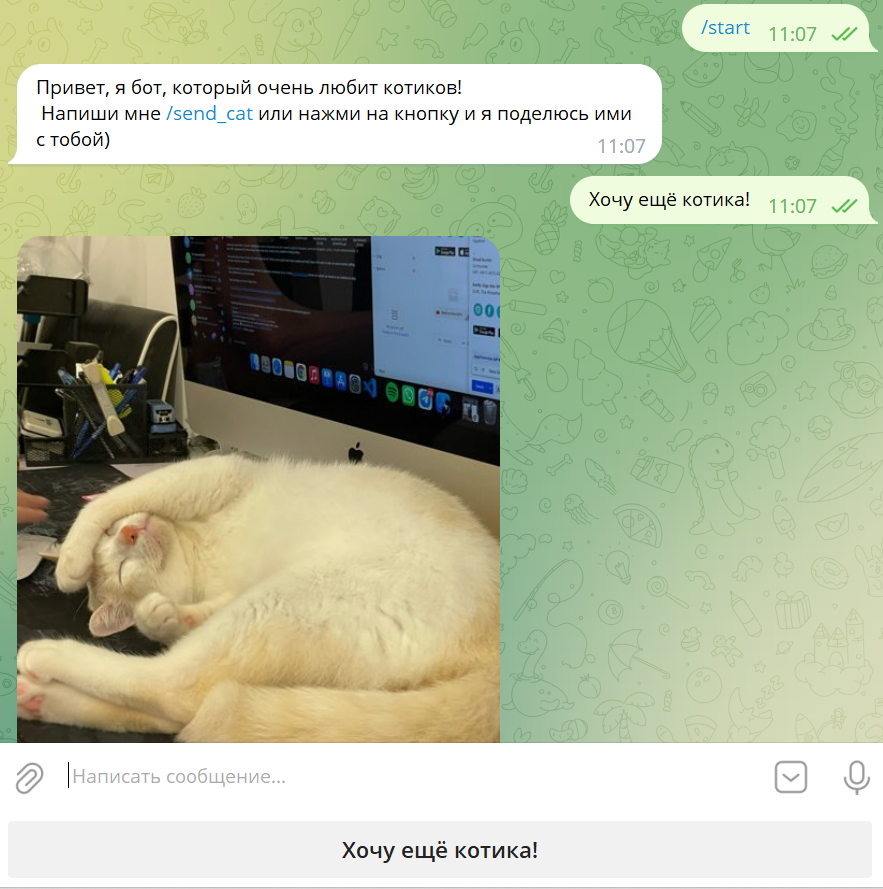

# 5. Бот с двумя виртуальными кнопками

Есть заранее заготовленные два фай­ла quotes.txt и facts.txt, которые содер­жат спи­сок цитат о языках программирования и факты о Python. На каж­дой стро­ке фай­лов находит­ся по одно­му фак­ту или цитате.

Сде­лаем бота, в котором будут две кноп­ки: «Цитаты» и «Факты». Если нажать любую, бот будет отправлять соот­ветс­тву­ющее сооб­щение.


1. Загружаем список интересных фактов и цитат из файлов:

In [ ]:
import telebot
import random

from telebot import types

f = open('facts.txt', 'r', encoding='UTF-8')
facts = f.read().split('\n')
f.close()

f = open('quotes.txt', 'r', encoding='UTF-8')
quotes  = f.read().split('\n')
f.close()

2. Описываем обработчик команды /start. В функции `start` создаем две кнопки, которые будут отправлять в чат текстовые сообщения 'Факт' и 'Цитата'.

In [ ]:
bot = telebot.TeleBot('Вписать токен, полученный от @botfather')

@bot.message_handler(commands=["start"])
def start(message, res=False):
        # добавляем кнопки
        markup=types.ReplyKeyboardMarkup(resize_keyboard=True)
        buttonA = types.KeyboardButton("Факт")
        buttonB = types.KeyboardButton("Цитата")
        # располагаем кнопки в ряд
        markup.row(buttonA, buttonB)
             
        bot.send_message(message.chat.id, 'Нажми: \nФакт для получения интересного факта о Python\nЦитата — для получения цитаты',  reply_markup=markup)

3. Описываем обработчик текстовых сообщений, присланных в чат:

In [ ]:
# Получение сообщений от пользователя
@bot.message_handler(content_types=["text"])
def handle_text(message):
    # если пользователь прислал 'Факт', выдаем ему случайный факт о Python
    if message.text.strip() == 'Факт' :
            answer = random.choice(facts)
    # если поьзователь прислал 'Цитата', выдаем умную мысль
    elif message.text.strip() == 'Цитата':
            answer = random.choice(quotes)
    # отсылаем юзеру сообщение в его чат
    bot.send_message(message.chat.id, answer)
# запускаем бота
bot.polling(none_stop=True, interval=0)

In [ ]:
# Полный код
import telebot
import random
from telebot import types

# загружаем список интересных фактов
f = open('facts.txt', 'r', encoding='UTF-8')
facts = f.read().split('\n')
f.close()

# загружаем список цитат
f = open('quotes.txt', 'r', encoding='UTF-8')
quotes  = f.read().split('\n')
f.close()

# создаем бота
bot = telebot.TeleBot('Вписать токен, полученный от @botfather')

# команда start
@bot.message_handler(commands=["start"])
def start(m, res=False):
        # добавляем две кнопки
        markup=types.ReplyKeyboardMarkup(resize_keyboard=True)
        item1=types.KeyboardButton("Факт")
        item2=types.KeyboardButton("Цитата")
        markup.row(item1, item2)
        
        bot.send_message(m.chat.id, 'Нажми: \nФакт для получения интересного факта\nПоговорка — для получения мудрой цитаты ',  reply_markup=markup)

# получение сообщений от пользователя
@bot.message_handler(content_types=["text"])
def handle_text(message):
    # если пользователь прислал 'Факт', выдаем ему случайный факт о Python
    if message.text.strip() == 'Факт' :
            answer = random.choice(facts)
    # если пользователь прислал 'Цитата', выдаем умную мысль
    elif message.text.strip() == 'Цитата':
            answer = random.choice(quotes)
    # отсылаем пользователю сообщение в чат
    bot.send_message(message.chat.id, answer)

# запускаем бота
bot.polling(none_stop=True, interval=0)

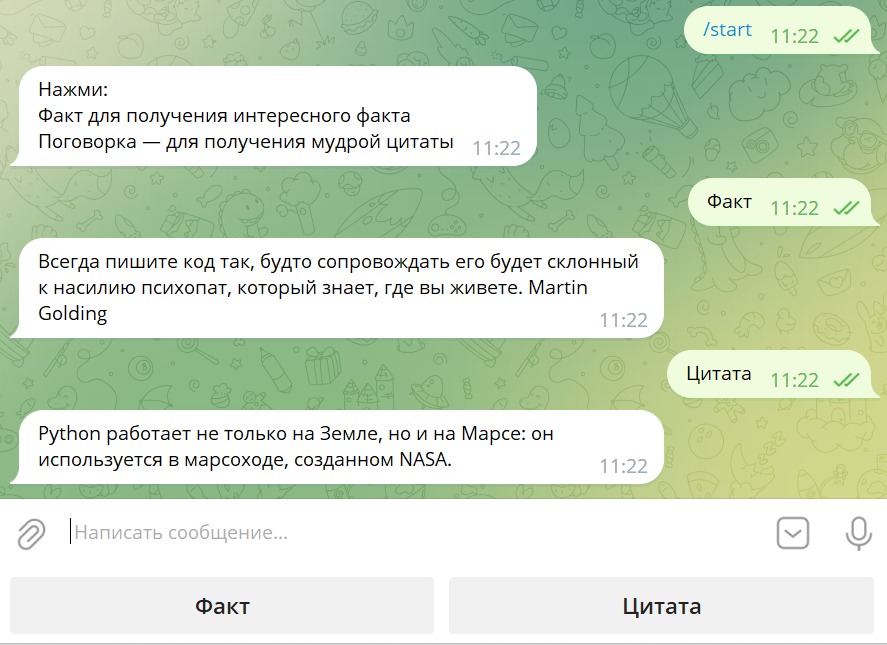

# 6. Бот "Угадай число"

При создании бота используем метод `register_next_step_handler`. Он принимает два обязательных аргумента: первый - это `message`, а второй - `function`. Метод ждёт сообщение пользователя и потом вызывает указанную функцию с аргументом `message`.

In [ ]:
from telebot import types

import telebot
import random

bot = telebot.TeleBot('Вписать токен, полученный от @botfather')
@bot.message_handler(commands=['start'])

def start(message: types.Message):
    rnumber = random.randint(0, 100)
    bot.send_message(message.chat.id, 'Отгадайте число от 0 до 100, у вас 6 попыток')
    bot.register_next_step_handler(message, get_number, 1, rnumber)

def get_number(message: types.Message, try_num: int, right_num: int):
    if message.text.isdigit():
        if right_num == int(message.text):
            bot.send_message(message.chat.id, 'Вы отгадали число!')
        else:
            if try_num >= 6:
                bot.send_message(message.chat.id, 'Мимо! Попытки кончились!')
                return

            if right_num < int(message.text):
                bot.send_message(message.chat.id, 'Загаданное число меньше введенного.')
            else:
                bot.send_message(message.chat.id, 'Загаданное число больше введенного.')
            bot.register_next_step_handler(message, get_number, try_num + 1, right_num)

    else:
        bot.send_message(message.chat.id, 'Вы ввели не число. Попробуйте еще раз.')
        bot.register_next_step_handler(message, get_number, try_num, right_num)
bot.polling(none_stop=True, interval=0)

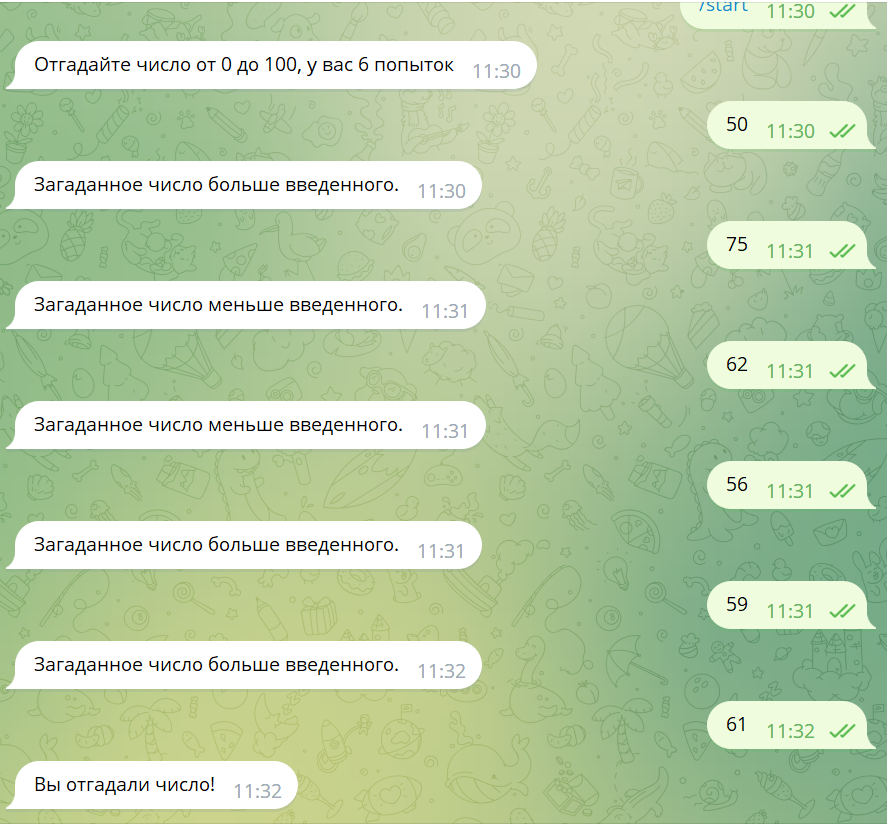